In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Load data
df = pd.read_pickle("./GTZAN/rawFeaturesGTZAN.pkl")
df.head()

,path,rmse-mean,rmse-std,zero-cross-rate-mean,zero-cross-rate-std,tempo,spectral-centroid-mean,spectral-centroid-std,spectral-bandwith-mean,spectral-bandwith-std,...,mfcc16-std,mfcc17-mean,mfcc17-std,mfcc18-mean,mfcc18-std,mfcc19-mean,mfcc19-std,mfcc20-mean,mfcc20-std,class
0,./datasetGTZAN\blues\blues.00000.wav,0.126542,0.061455,0.082965,0.034249,126.048018,1663.800560,386.144987,1916.477157,312.207688,...,7.240229,-1.690215,6.043515,-0.408979,6.449582,-2.303523,7.420440,1.221290,6.850987,0
1,./datasetGTZAN\blues\blues.00001.wav,0.092873,0.054362,0.055971,0.044518,105.468750,1374.597283,600.812049,1903.650793,481.134502,...,7.440188,-0.731125,7.766243,0.295073,6.936901,-0.283518,7.148860,0.531216,6.766556,0
2,./datasetGTZAN\blues\blues.00002.wav,0.171918,0.063365,0.076219,0.037509,156.605114,1449.398792,427.029097,1649.908502,321.481332,...,6.371716,-7.729093,6.902132,-1.816407,7.237551,-3.439720,6.829324,-2.231259,5.529287,0
3,./datasetGTZAN\blues\blues.00003.wav,0.137898,0.085049,0.033276,0.024394,178.205819,932.576083,425.051799,1457.552363,427.285835,...,6.665415,-3.319597,7.085667,0.636965,6.108939,-0.619121,6.104075,-3.407449,5.652375,0
4,./datasetGTZAN\blues\blues.00004.wav,0.088730,0.052974,0.101364,0.050315,135.999178,1686.390461,593.145754,1652.992059,340.375118,...,9.278967,-5.454034,8.675812,-0.916874,7.322153,-4.404826,7.931633,-11.703234,7.429345,0


In [2]:
data = df.drop(["path", "class"], axis=1)
data[data.columns] = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True).fit_transform(data[data.columns])
X = data.to_numpy()

In [3]:
def viz2D(finalDf, xlabel, ylabel, title, save=False, saveName=None):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel(xlabel, fontsize = 15)
    ax.set_ylabel(ylabel, fontsize = 15)
    ax.set_title(title, fontsize = 20)
    targets = list(range(10))
    classNames = ["Blues", "Classical", "Country", "Disco", "HipHop", "Jazz", "Metal", "Pop", "Reaggea", "Rock"]
    colors = ["blue", "green", "orange", "purple", "red", "brown", "pink", "gray", "olive", "cyan"]
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf["class"] == target
        ax.scatter(finalDf.loc[indicesToKeep, xlabel], finalDf.loc[indicesToKeep, ylabel], 
                c = color, s = 50, alpha=0.7)
    ax.legend(classNames)
    ax.grid()
    plt.savefig(f"./images/{saveName}.jpg") if save else plt.show()

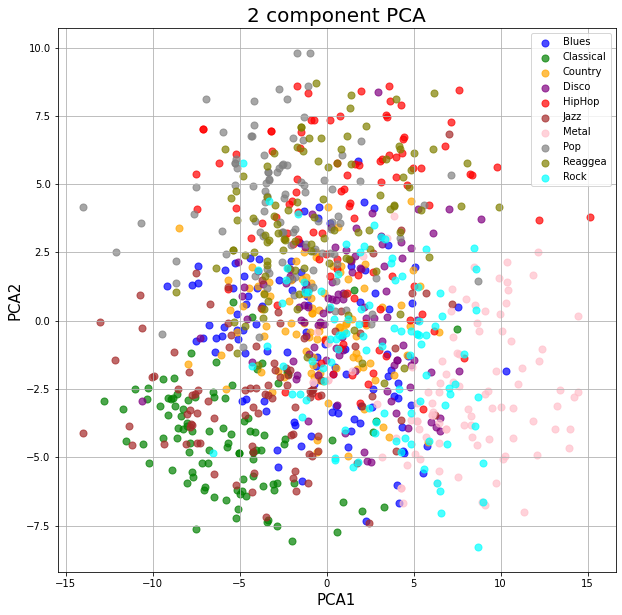

In [4]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ["PCA1", "PCA2"])
finalDf = pd.concat([principalDf, df[["class"]]], axis = 1)
viz2D(finalDf, "PCA1", "PCA2", "2 component PCA", save=True, saveName="PCA-GTZAN-scaled")

C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


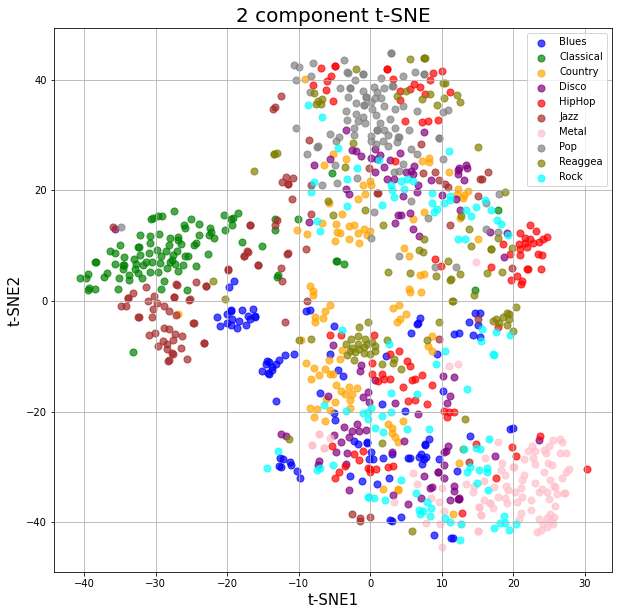

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=35)
tsneResults = tsne.fit_transform(X)
tsneDf = pd.DataFrame(data = tsneResults, columns = ["t-SNE1", "t-SNE2"])
finalDf = pd.concat([tsneDf, df[["class"]]], axis = 1)
viz2D(finalDf, "t-SNE1", "t-SNE2", "2 component t-SNE", save=True, saveName="tSNE-GTZAN-scaled")

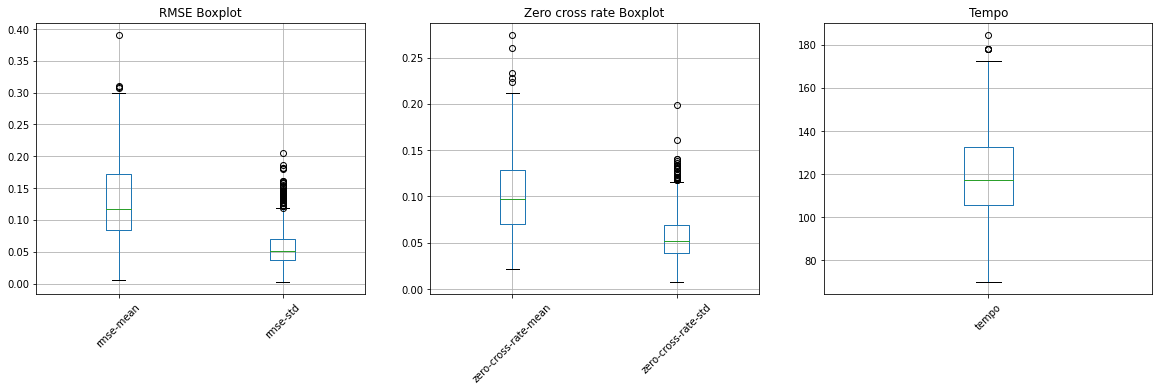

In [22]:
columns = list(df.columns)
columns.remove("path")
columns.remove("class")

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df.boxplot(column = columns[:2], rot=45)
plt.title("RMSE Boxplot")

plt.subplot(1,3,2)
df.boxplot(column = columns[2:4], rot=45)
plt.title("Zero cross rate Boxplot")

plt.subplot(1,3,3)
df.boxplot(column = columns[4:5], rot=45)
plt.title("Tempo")
plt.show()

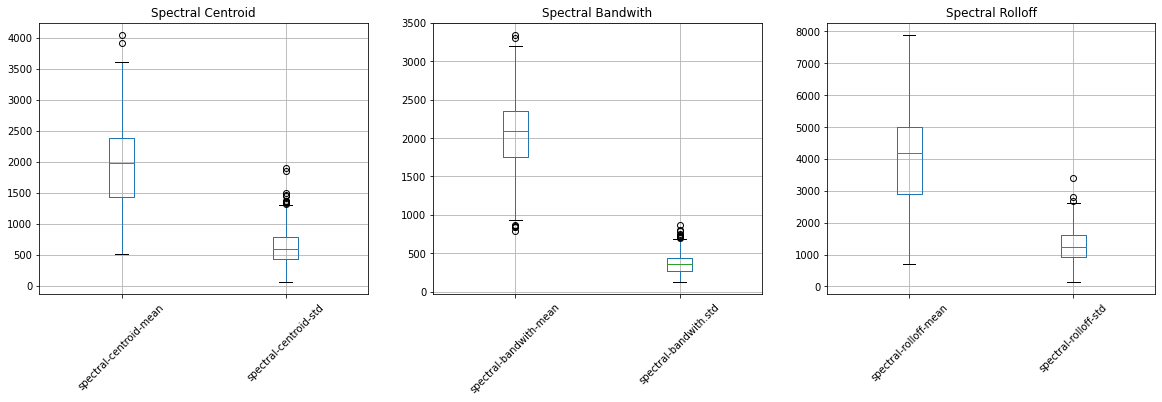

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
df.boxplot(column = columns[5:7], rot=45)
plt.title("Spectral Centroid")

plt.subplot(1,3,2)
df.boxplot(column = columns[7:9], rot=45)
plt.title("Spectral Bandwith")

plt.subplot(1,3,3)
df.boxplot(column = columns[9:11], rot=45)
plt.title("Spectral Rolloff")
plt.show()

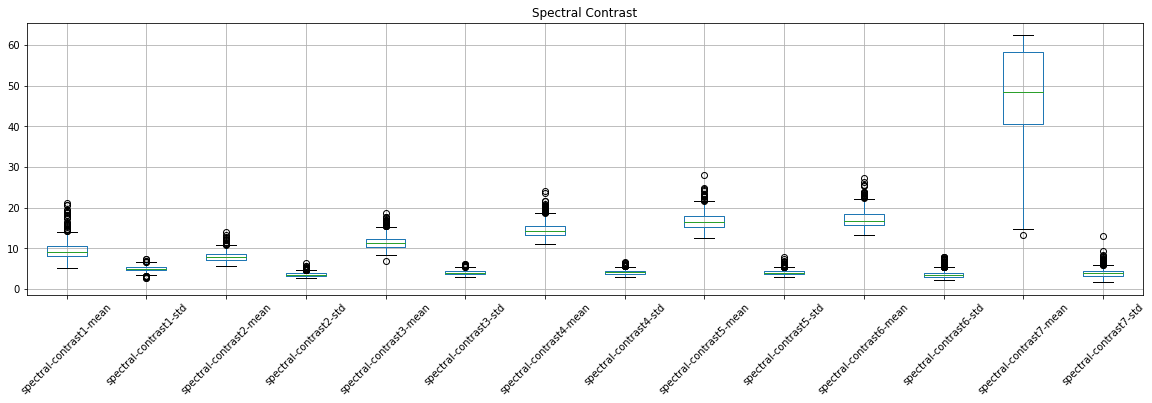

In [15]:
plt.figure(figsize=(20,5))
df.boxplot(column = columns[11:25], rot=45)
plt.title("Spectral Contrast")
plt.show()

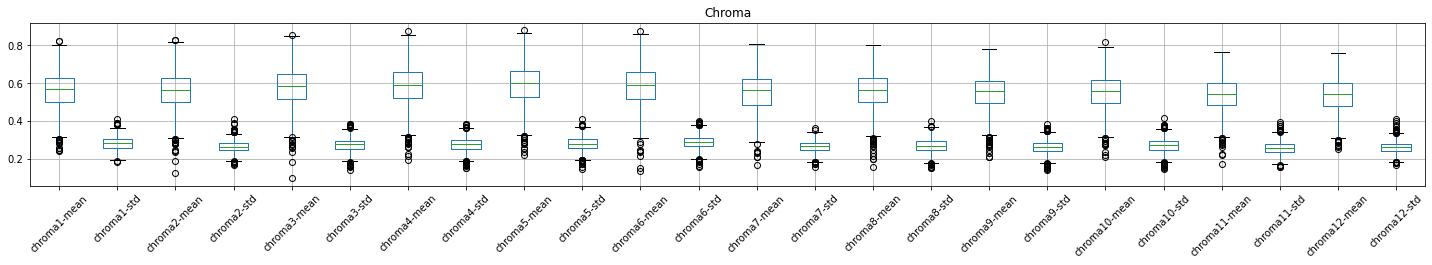

In [34]:
plt.figure(figsize=(25,3))
df.boxplot(column = columns[25:49], rot=45)
plt.title("Chroma")
plt.show()

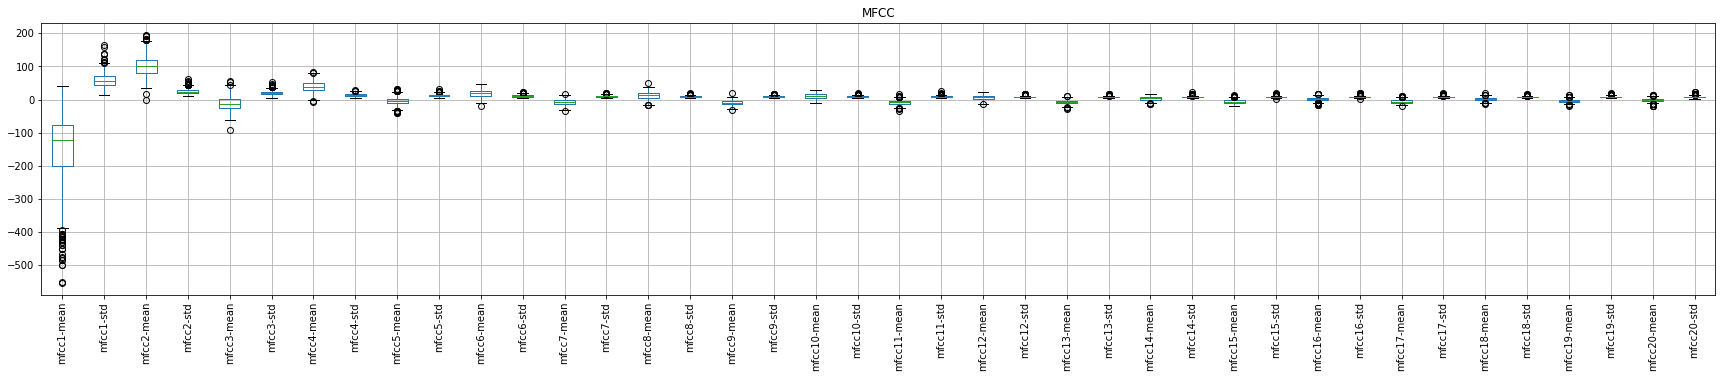

In [36]:
plt.figure(figsize=(30,5))
df.boxplot(column = columns[49:], rot=90)
plt.title("MFCC")
plt.show()